In [6]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

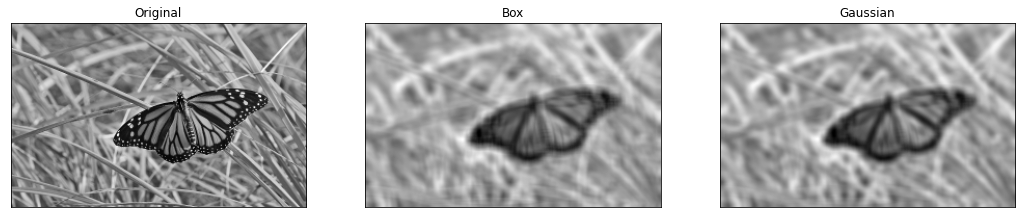

In [7]:
#  Box filer


img = cv.imread('butterfly.jpg', cv.IMREAD_REDUCED_GRAYSCALE_4)

# Box filter
box = 1./81.*np.ones((9,9))
imgb = cv.filter2D(img,-1,box)


# Box filter
gaus = cv.getGaussianKernel(9, 4)
imgg = cv.sepFilter2D(img, -1, gaus, gaus)


fig, axes  = plt.subplots(1,3, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgb, cmap='gray')
axes[1].set_title('Box')
axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(imgg, cmap='gray')
axes[2].set_title('Gaussian')
axes[2].set_xticks([]), axes[1].set_yticks([])
plt.show()

NotImplementedError: Axes3D currently only supports the aspect argument 'auto'. You passed in 'equal'.

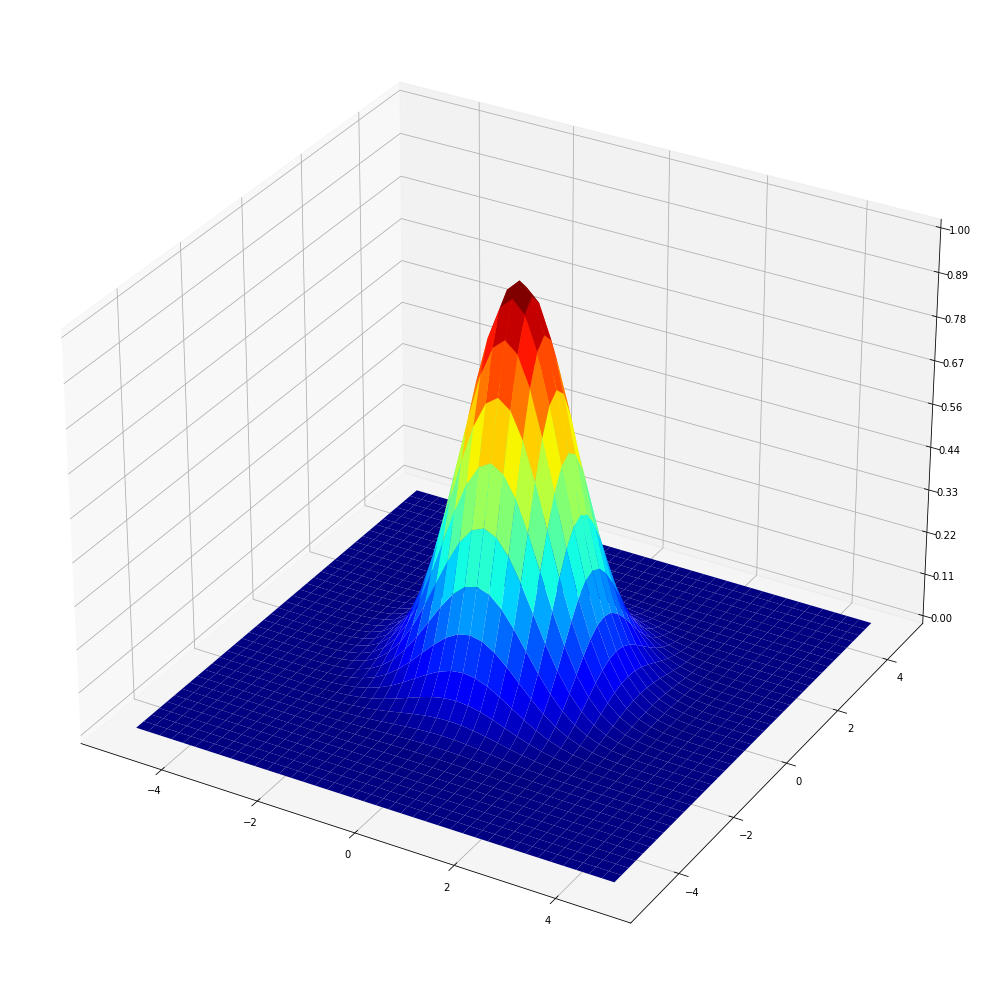

In [2]:
import cv2 as cv

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(111, projection='3d')
sigma = 1


X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-(X**2 + Y**2)/(2*sigma**2))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0, antialiased=True)

# Customize the z axis.


#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_aspect('equal', 'box')


#ax.view_init(90, 0)

cset = ax.contourf(X, Y, Z, zdir='z', offset=np.min(Z) -1.5, cmap=cm.jet)
ax.set_zlim(np.min(Z) - 2, np.max(Z))
# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)
# Hide grid lines
# ax.grid(False)
plt.axis('off')

# Hide axes ticks
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])

# plt.savefig('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/gaussian_2d_5.jpg')

plt.show()

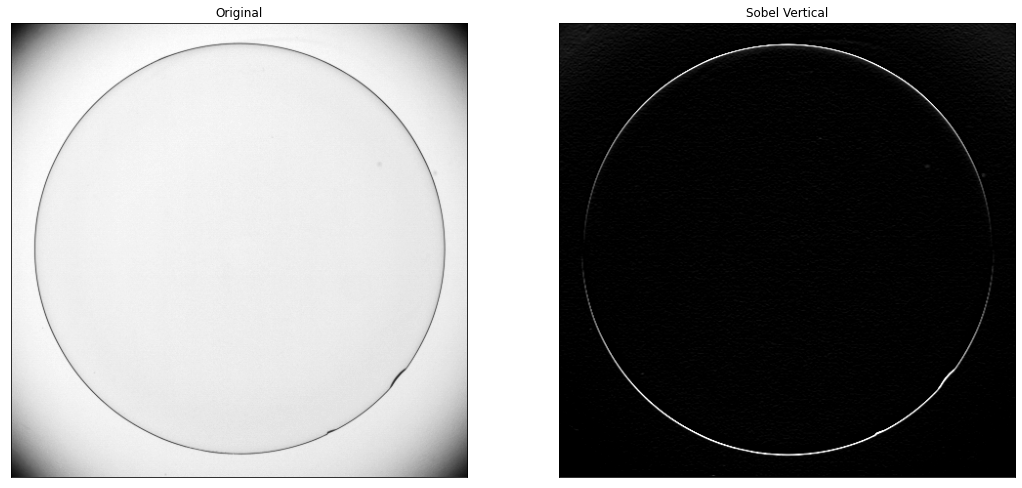

In [8]:
#sobel vertical



img = cv.imread('contact_lens.tif', cv.IMREAD_REDUCED_GRAYSCALE_2)

# Sobel vertical
kernel = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype='float')
imgc = cv.filter2D(img,-1,kernel)



fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Sobel Vertical')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

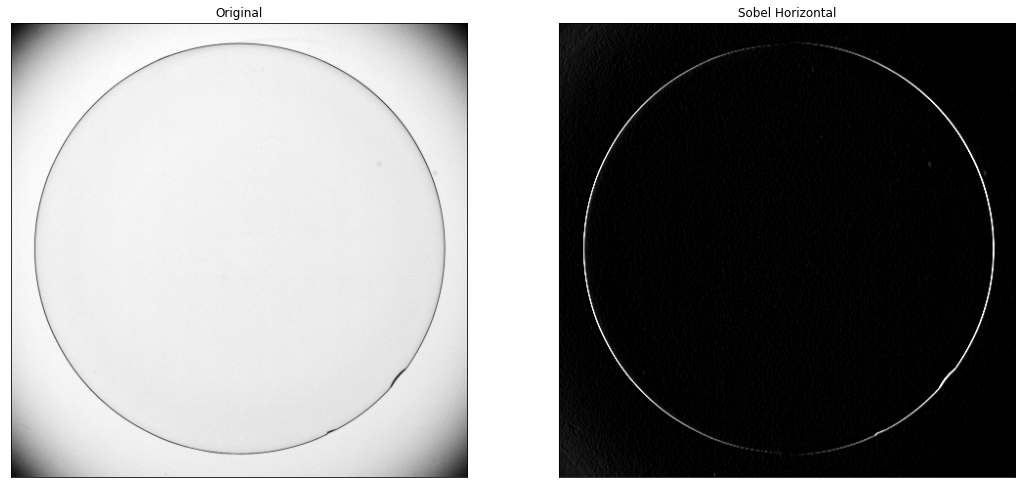

In [9]:
# Sobel Horiontal


img = cv.imread('contact_lens.tif', cv.IMREAD_REDUCED_GRAYSCALE_2)


# Sobel horizontal
kernel = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype='float')
imgc = cv.filter2D(img,-1,kernel)


fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Sobel Horizontal')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

In [10]:

import skimage.exposure

img = cv2.imread('contact_lens.tif', cv2.IMREAD_GRAYSCALE)

img = cv2.GaussianBlur(img, (0,0), sigmaX=1.5, sigmaY=1.5)

Kx = np.array([[-1, 0, 1], 
               [-2, 0, 2], 
               [-1, 0, 1]])
Ky = np.array([[1,   2,  1], 
               [0,   0,  0], 
              [-1,  -2, -1]])

Ix = cv2.filter2D(img, -1, Kx)
Iy = cv2.filter2D(img, -1, Ky)

G = np.hypot(Ix, Iy)
G = skimage.exposure.rescale_intensity(G, in_range='image', out_range=(0,255)).astype(np.uint8)

theta = np.arctan2(Iy, Ix)
theta = skimage.exposure.rescale_intensity(theta, in_range='image', out_range=(0,255)).astype(np.uint8)
   
cv2.imwrite('black_dress_gradient_magnitude.png', G)
cv2.imwrite('black_dress_gradient_direction.png', theta)

cv2.imshow("magnitude", G)
cv2.imshow("direction", theta)
cv2.waitKey(0)

ModuleNotFoundError: No module named 'skimage'

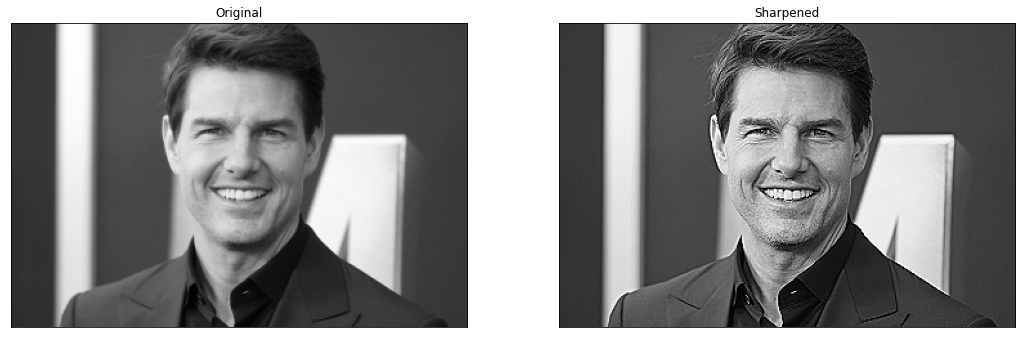

In [11]:


img = cv.imread('tom.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)

# Sobel vertical
kernel = np.array([(0, -1, 0), (-1, 5, -1), (0, -1, 0)], dtype='float')
imgc = cv.filter2D(img,-1,kernel)



fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Sharpened')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()